In [21]:
from datetime import datetime
import pandas as pd
import folium
import requests
from google_api import get_lat_lon
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv('cleaned1.csv').drop(['Unnamed: 0'],axis=1)
df=df.dropna()


In [12]:
df.dtypes

price          int64
Address       object
bedroom        int64
bathroom       int64
size_sqf       int64
types         object
city          object
province      object
Latitude     float64
Longitude    float64
dtype: object

In [15]:
bedrooms = df['bedroom'].value_counts()
bathrooms=df['bathroom'].value_counts()


In [ ]:
ax = bedrooms.plot(kind='bar',title="Number of houses by bedrooms")
ax.set_xlabel("Number of bedrooms")
ax.set_ylabel("Frequency")
for container in ax.containers:
    plt.bar_label(container)


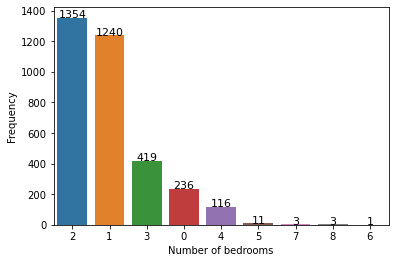

In [35]:
ax = sns.countplot(x=df['bedroom'],
                   order=df['bedroom'].value_counts(ascending=False).index);
ax.set_xlabel("Number of bedrooms")
ax.set_ylabel("Frequency")

abs_values = df['bedroom'].value_counts(ascending=False).values

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)



In [36]:
ax.patches